# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

"How do average salaires compare across different industries?"

In [4]:
library(tidyverse)
library(stringr)

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [30]:
train_features_df <- read.csv('data/train_features.csv')
train_salaries_df <- read.csv('data/train_salaries.csv')
test_features_df <- read.csv('data/test_features.csv')

### ---- 3 Clean the data ----

#### Examine the Data

In [5]:
head(train_features_df, 10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
2,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
3,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
4,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
5,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
6,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
7,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
8,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
9,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54


In [6]:
head(train_salaries_df, 10)

,jobId,salary
,<chr>,<int>
1,JOB1362684407687,130
2,JOB1362684407688,101
3,JOB1362684407689,137
4,JOB1362684407690,142
5,JOB1362684407691,163
6,JOB1362684407692,113
7,JOB1362684407693,178
8,JOB1362684407694,73
9,JOB1362684407695,31


In [7]:
head(test_features_df, 10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
2,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
3,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
4,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
5,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
6,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
7,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
8,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
9,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78


#### --- Use glimpse() to check length and dtype ---

In [10]:
glimpse(train_features_df)

Rows: 1,000,000
Columns: 8
$ jobId               <chr> "JOB1362684407687", "JOB1362684407688", "JOB136268~
$ companyId           <chr> "COMP37", "COMP19", "COMP52", "COMP38", "COMP7", "~
$ jobType             <chr> "CFO", "CEO", "VICE_PRESIDENT", "MANAGER", "VICE_P~
$ degree              <chr> "MASTERS", "HIGH_SCHOOL", "DOCTORAL", "DOCTORAL", ~
$ major               <chr> "MATH", "NONE", "PHYSICS", "CHEMISTRY", "PHYSICS",~
$ industry            <chr> "HEALTH", "WEB", "HEALTH", "AUTO", "FINANCE", "FIN~
$ yearsExperience     <int> 10, 3, 10, 8, 8, 2, 23, 9, 1, 17, 24, 7, 8, 21, 21~
$ milesFromMetropolis <int> 83, 73, 38, 17, 16, 31, 24, 70, 54, 68, 30, 79, 29~


In [11]:
glimpse(train_salaries_df)

Rows: 1,000,000
Columns: 2
$ jobId  <chr> "JOB1362684407687", "JOB1362684407688", "JOB1362684407689", "JO~
$ salary <int> 130, 101, 137, 142, 163, 113, 178, 73, 31, 104, 102, 144, 79, 1~


In [12]:
glimpse(test_features_df)

Rows: 1,000,000
Columns: 8
$ jobId               <chr> "JOB1362685407687", "JOB1362685407688", "JOB136268~
$ companyId           <chr> "COMP33", "COMP13", "COMP10", "COMP21", "COMP36", ~
$ jobType             <chr> "MANAGER", "JUNIOR", "CTO", "MANAGER", "JUNIOR", "~
$ degree              <chr> "HIGH_SCHOOL", "NONE", "MASTERS", "HIGH_SCHOOL", "~
$ major               <chr> "NONE", "NONE", "BIOLOGY", "NONE", "BIOLOGY", "COM~
$ industry            <chr> "HEALTH", "AUTO", "HEALTH", "OIL", "OIL", "FINANCE~
$ yearsExperience     <int> 22, 20, 17, 14, 10, 6, 6, 9, 6, 23, 23, 14, 5, 0, ~
$ milesFromMetropolis <int> 73, 47, 9, 96, 44, 23, 32, 73, 78, 97, 60, 48, 1, ~


#### Check for Duplicates, Remove Invalid Data

##### look for duplicate data, invalid data (e.g. salaries <= 0), or corrupt data and remove it

In [31]:
train_features_df <- distinct(train_features_df) %>% filter(train_salaries_df$salary > 0)
test_features_df <- distinct(test_features_df) %>% filter(train_salaries_df$salary > 0)
train_salaries_df <- distinct(train_salaries_df) %>% filter(salary > 0)

#### Identify Numerical and Categorical Columns 

In [143]:
num_cols <- c('yearsExperience', 'milesFromMetropolis')
cat_cols <- c('jobId', 'companyId', 'jobType', 'degree', 'major', 'industry')

#### Summarize Numerical and Categorical Variables Separately 

#### --- Numerical Variables Summary ---

In [139]:
summary(train_features_df %>% select(num_cols))

 yearsExperience milesFromMetropolis
 Min.   : 0.00   Min.   : 0.00      
 1st Qu.: 6.00   1st Qu.:25.00      
 Median :12.00   Median :50.00      
 Mean   :11.99   Mean   :49.53      
 3rd Qu.:18.00   3rd Qu.:75.00      
 Max.   :24.00   Max.   :99.00      

#### --- Categorical Variables Summary ---

In [182]:
unique <- NULL
top <- NULL
frequency <- NULL
for (col in cat_cols) {
    unique <- c(unique, n_distinct(train_features_df[col]))
    col_summary <- train_features_df %>%
        group_by(!!sym(col)) %>%
        summarise(count = n()) %>%
        filter(if (col == 'jobId') jobId == 'JOB1362685219071' else count == max(count))
    top <- c(top, col_summary[[col]])
    frequency <- c(frequency, col_summary[['count']])
}

In [204]:
t(data.frame(count = rep(999995, 6), unique, top, frequency, row.names = cat_cols))

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362685219071,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
frequency,1,16193,125886,236975,532353,143205


#### Merge features and targets

In [205]:
train_df <- train_features_df %>% right_join(train_salaries_df, by = "jobId")

In [206]:
head(train_df, 10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
2,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
3,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
4,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
5,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
6,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
7,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
8,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
9,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31


### ---- 4 Explore the data (EDA) ----

#### visualize target variable (salary) 

In [217]:
library(repr)
options(repr.plot.width=20, repr.plot.height=10)

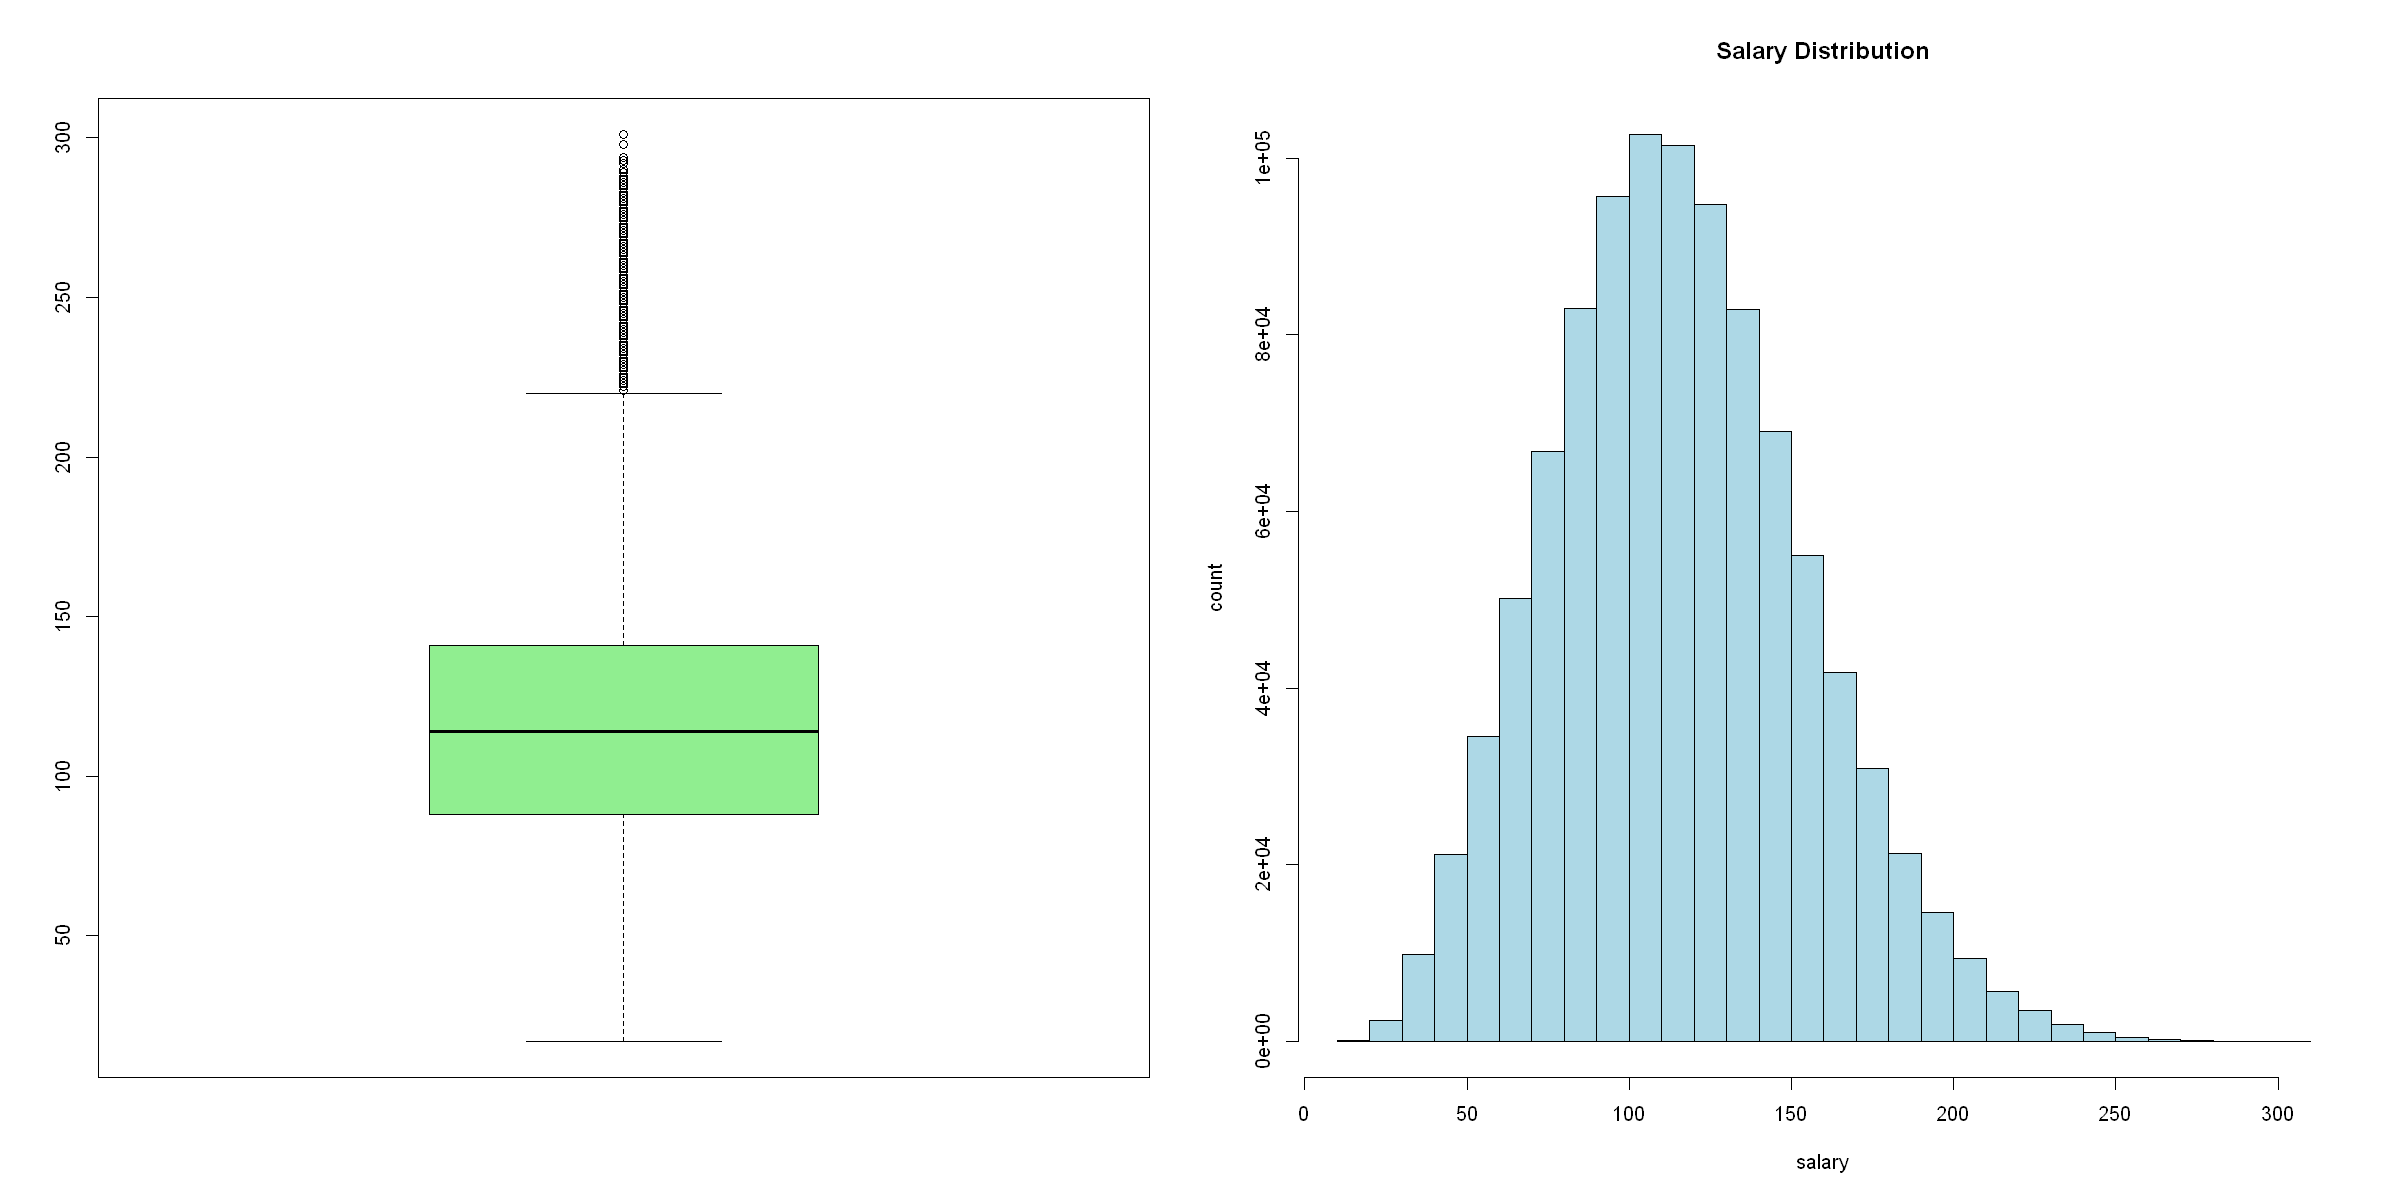

In [330]:
par(mfrow=c(1,2))
boxplot(train_df$salary, col = 'light green')
hist(train_df$salary, xlab = 'salary', ylab = 'count', main = 'Salary Distribution', col = 'light blue')

#### Use IQR rule to identify potential ouotliers

In [228]:
stat <- summary(train_df$salary)
q25 <- stat[2]
q50 <- stat[3]
q75 <- stat[5]
IQR <- q75 - q25
upper <- q75 + 1.5 * IQR
lower <- q25 - 1.5 * IQR
stat

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   17.0    88.0   114.0   116.1   141.0   301.0 

In [235]:
outliers <- train_df %>% 
    filter(salary < lower | salary > upper)

#### Examine potential outliers

In [236]:
# job salary outside the IQR
head(outliers, 10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
2,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
3,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
4,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
5,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
6,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
7,JOB1362684408673,COMP37,CFO,HIGH_SCHOOL,NONE,FINANCE,24,20,229
8,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
9,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225


#### --- Most suspicious outliers above the upper bound ---

In [237]:
outliers %>% filter(jobType == 'JUNIOR' & salary > upper)

jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226


The high-salary potential outliers seems legitimate; most roles are C-level and the junior level jobs are in industries that generally pay more (e.g. oil, finance). These data is legitimate and we will not remove them on ground of possible corruption. 

#### look for correlation between each feature and the target

In [331]:
plot_feature <- function(df, col) {
    if (col %in% cat_cols & col != 'companyId') {
        df[[col]] <- fct_reorder(df[[col]], df$salary, mean)
        df %>% ggplot() +
            geom_boxplot(aes(x = !!sym(col), y = salary, fill = !!sym(col))) +
            theme(legend.position = "none")
    } else if (col == 'companyId') {
        df[[col]] <- fct_reorder(df[[col]], df$salary, mean)
        df %>% ggplot(aes(x = !!sym(col), y = salary, fill = !!sym(col))) +
            geom_boxplot() +
            coord_flip() +
            theme(legend.position = "none")
    } else {
        df %>% ggplot() +
            geom_point(aes(x = !!sym(col), y = salary))
    }
}

In [310]:
library(repr)
options(repr.plot.width=20, repr.plot.height=10)

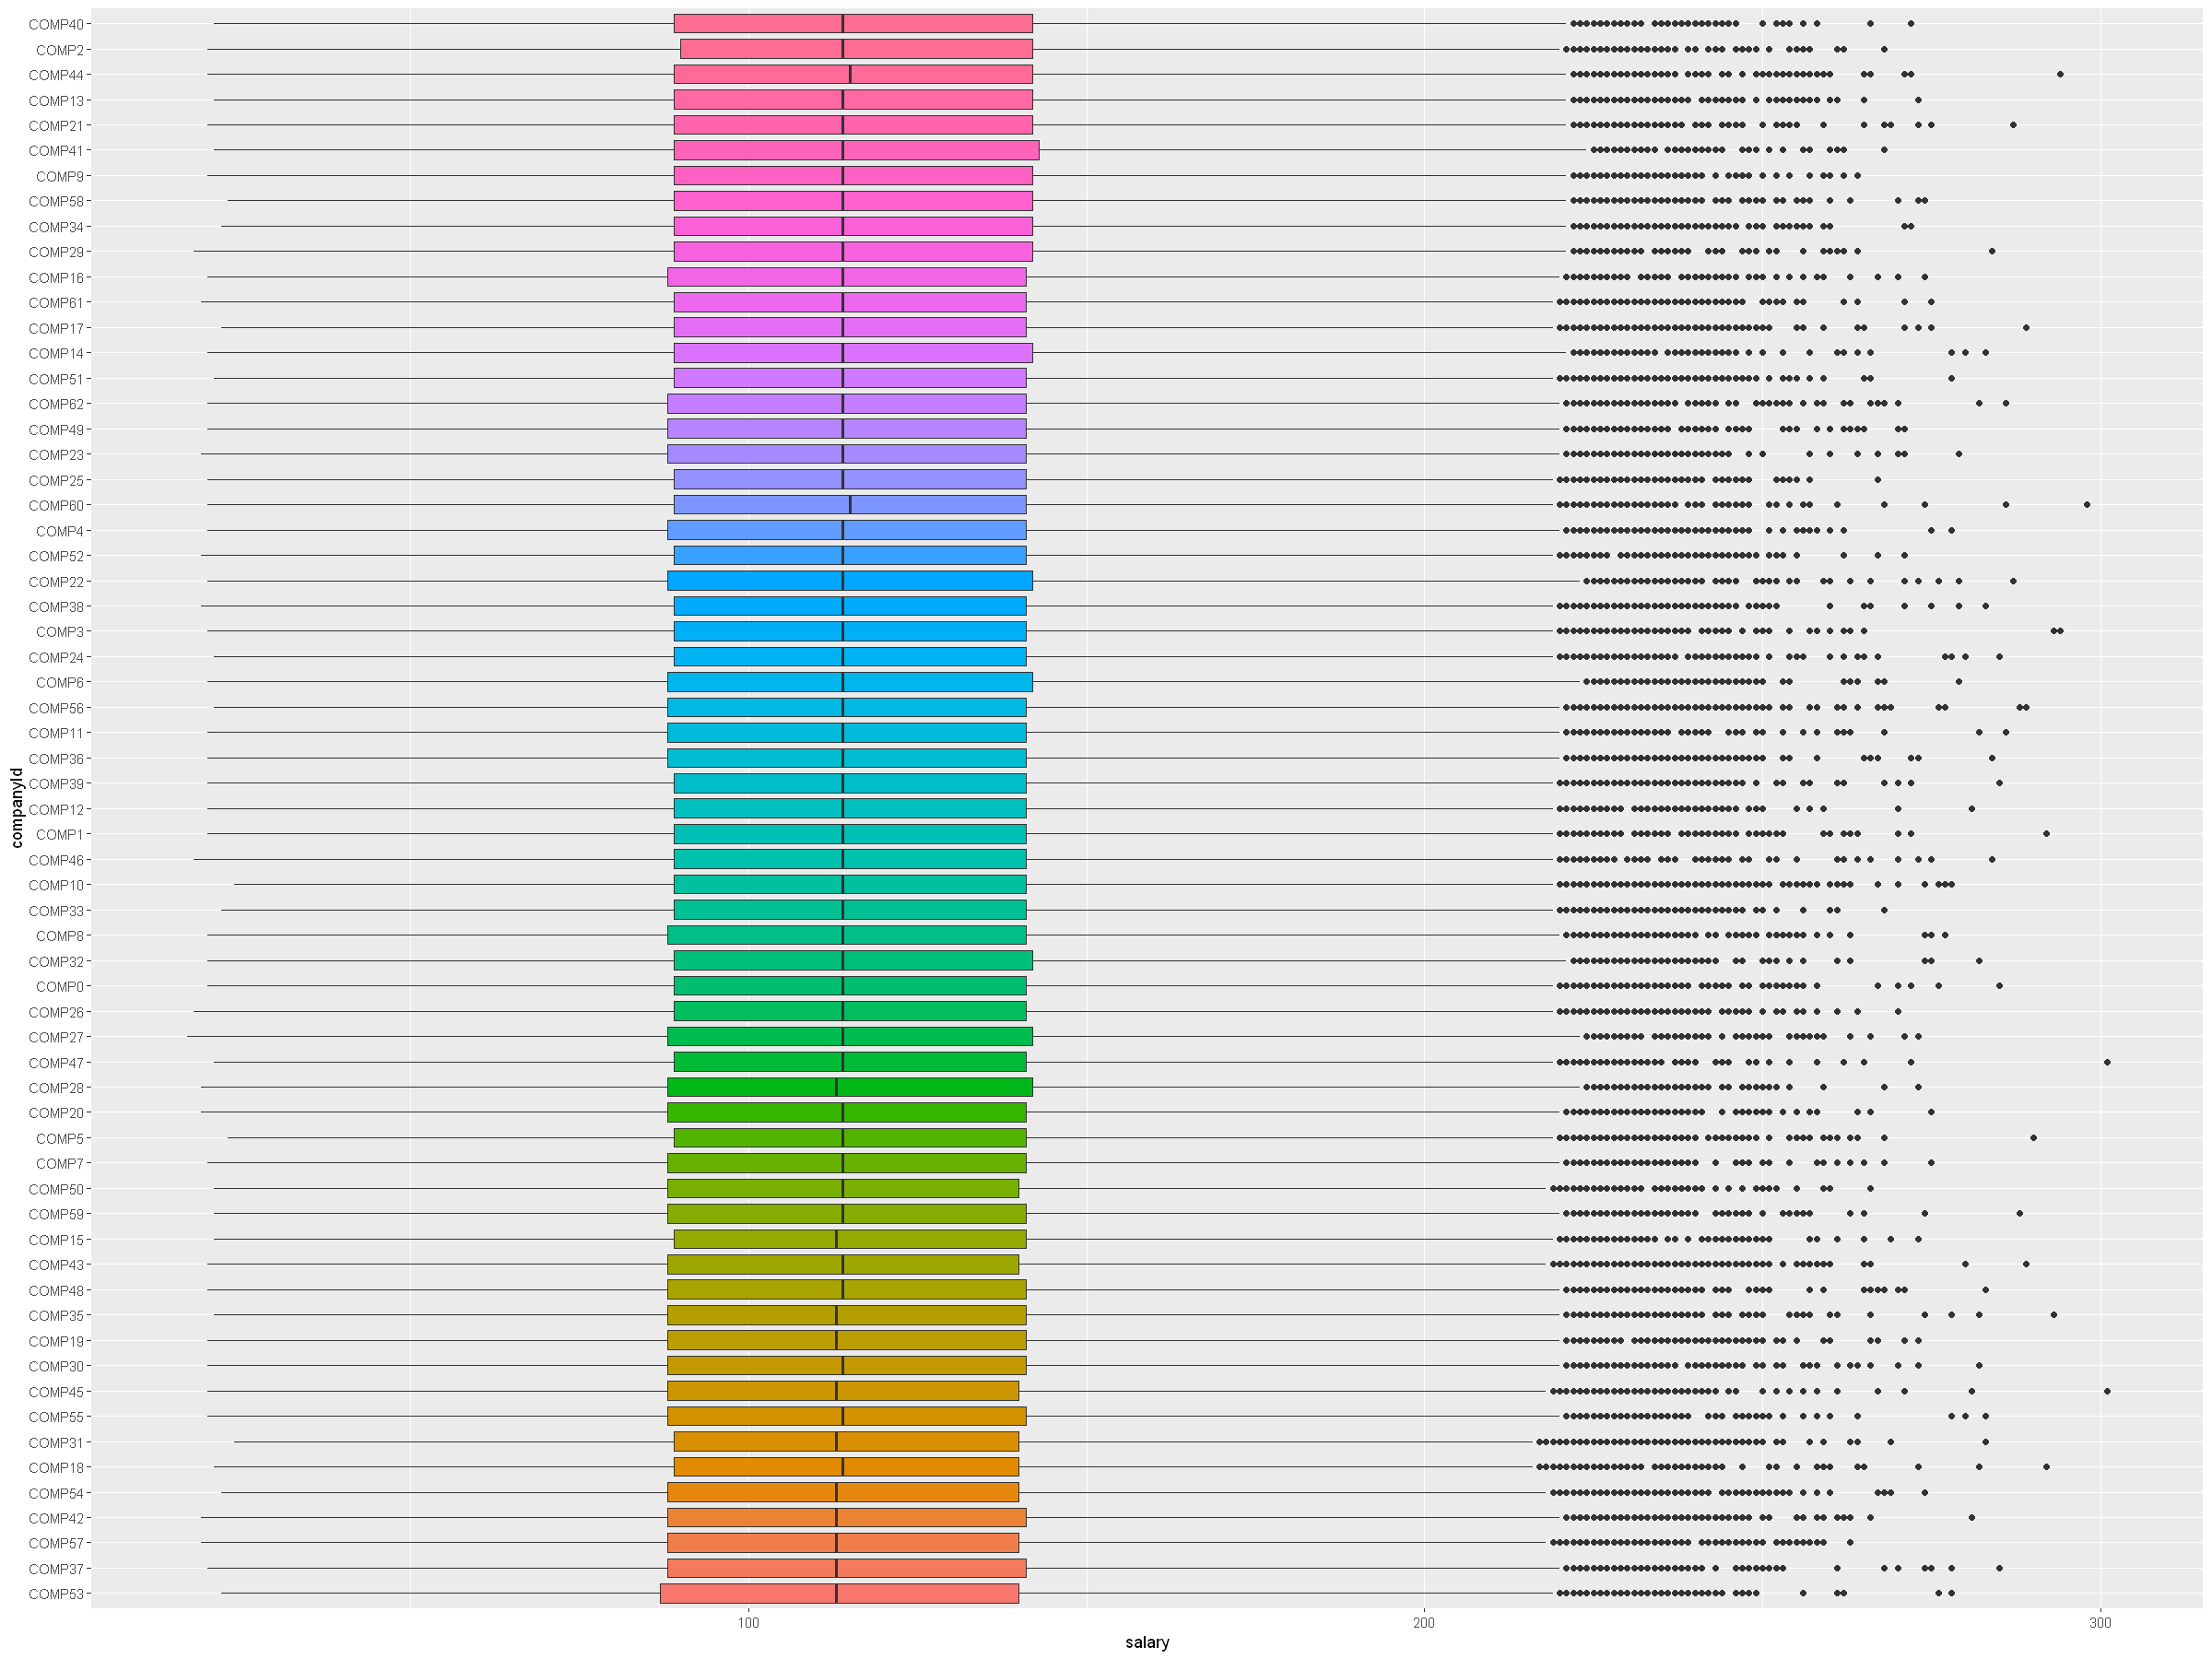

In [306]:
plot_feature(train_df, 'companyId')

#### Salary has a weak correlation with companyId

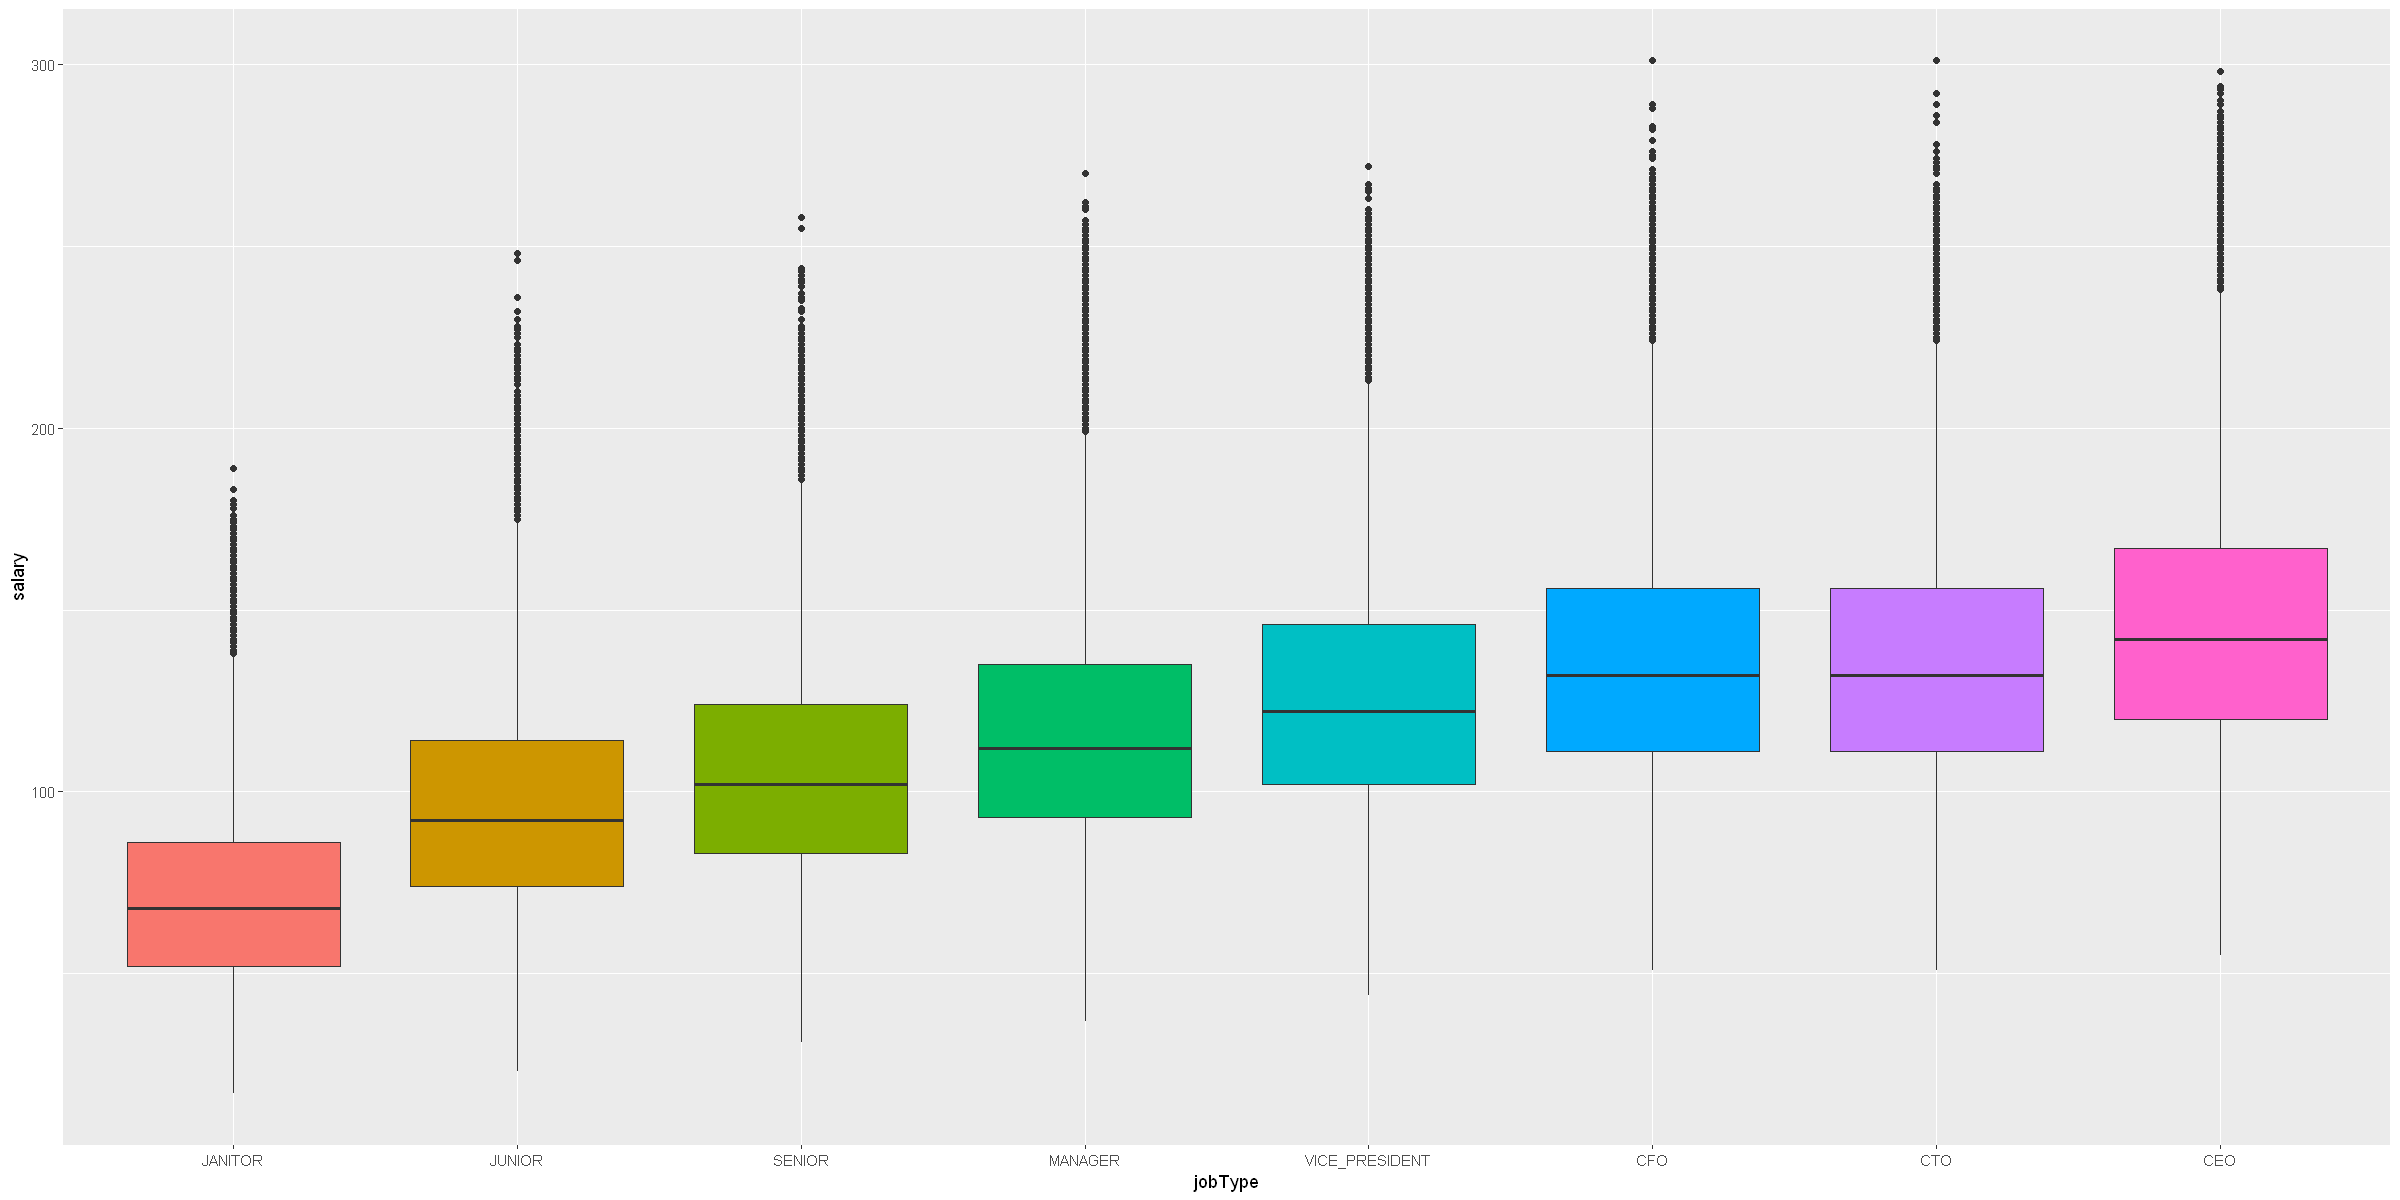

In [311]:
plot_feature(train_df, 'jobType')

#### Salary has a moderately positive correlation with jobType

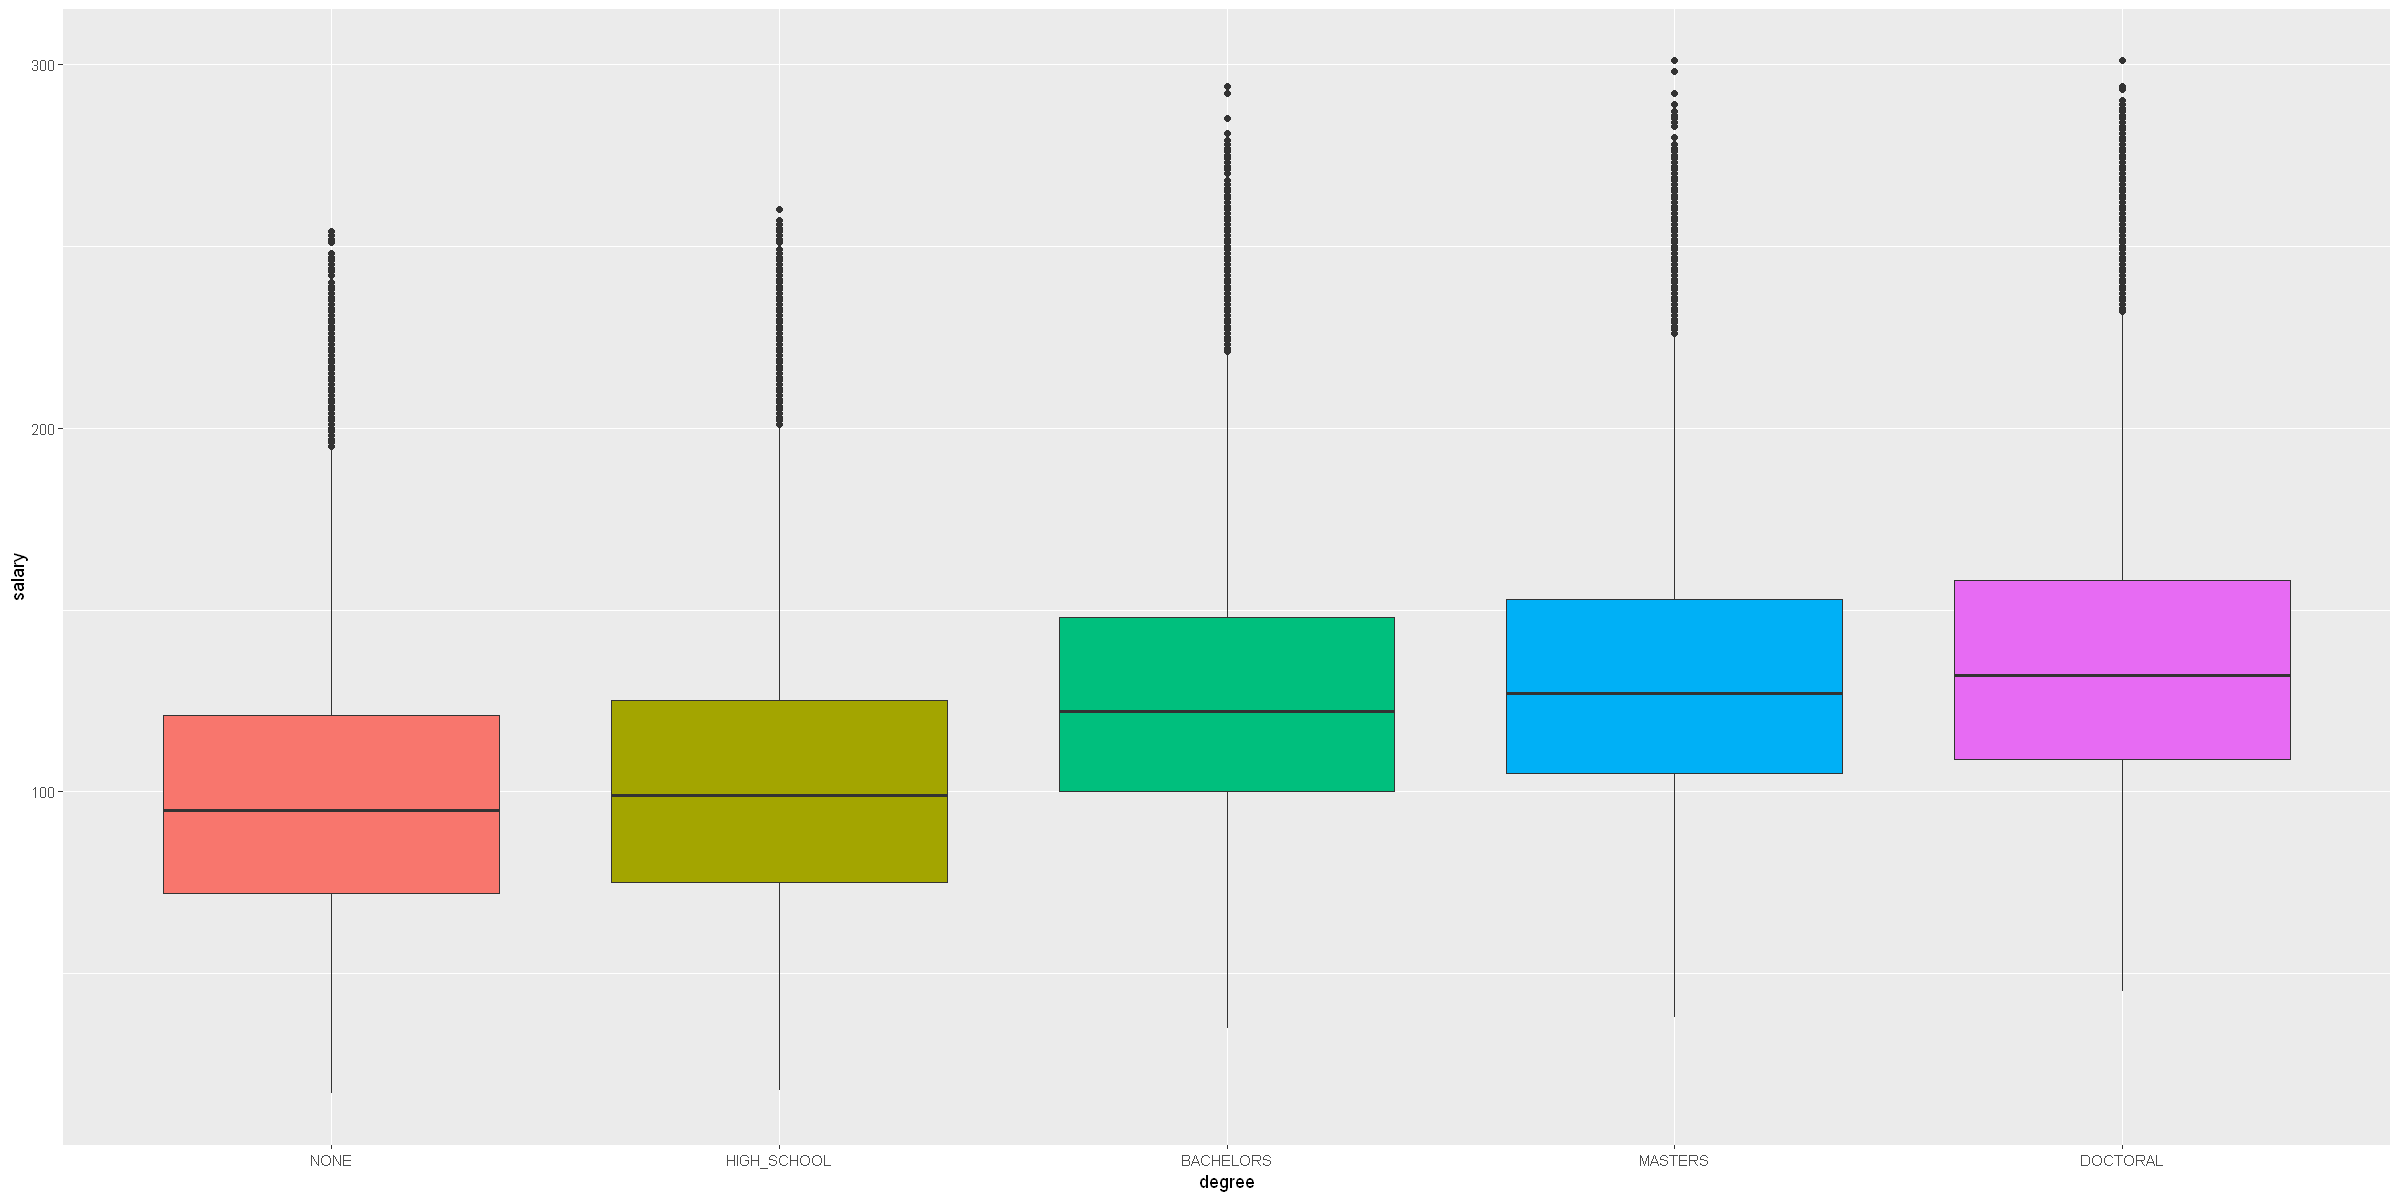

In [312]:
plot_feature(train_df, 'degree')

#### Salary has a weak positive correlation with degree

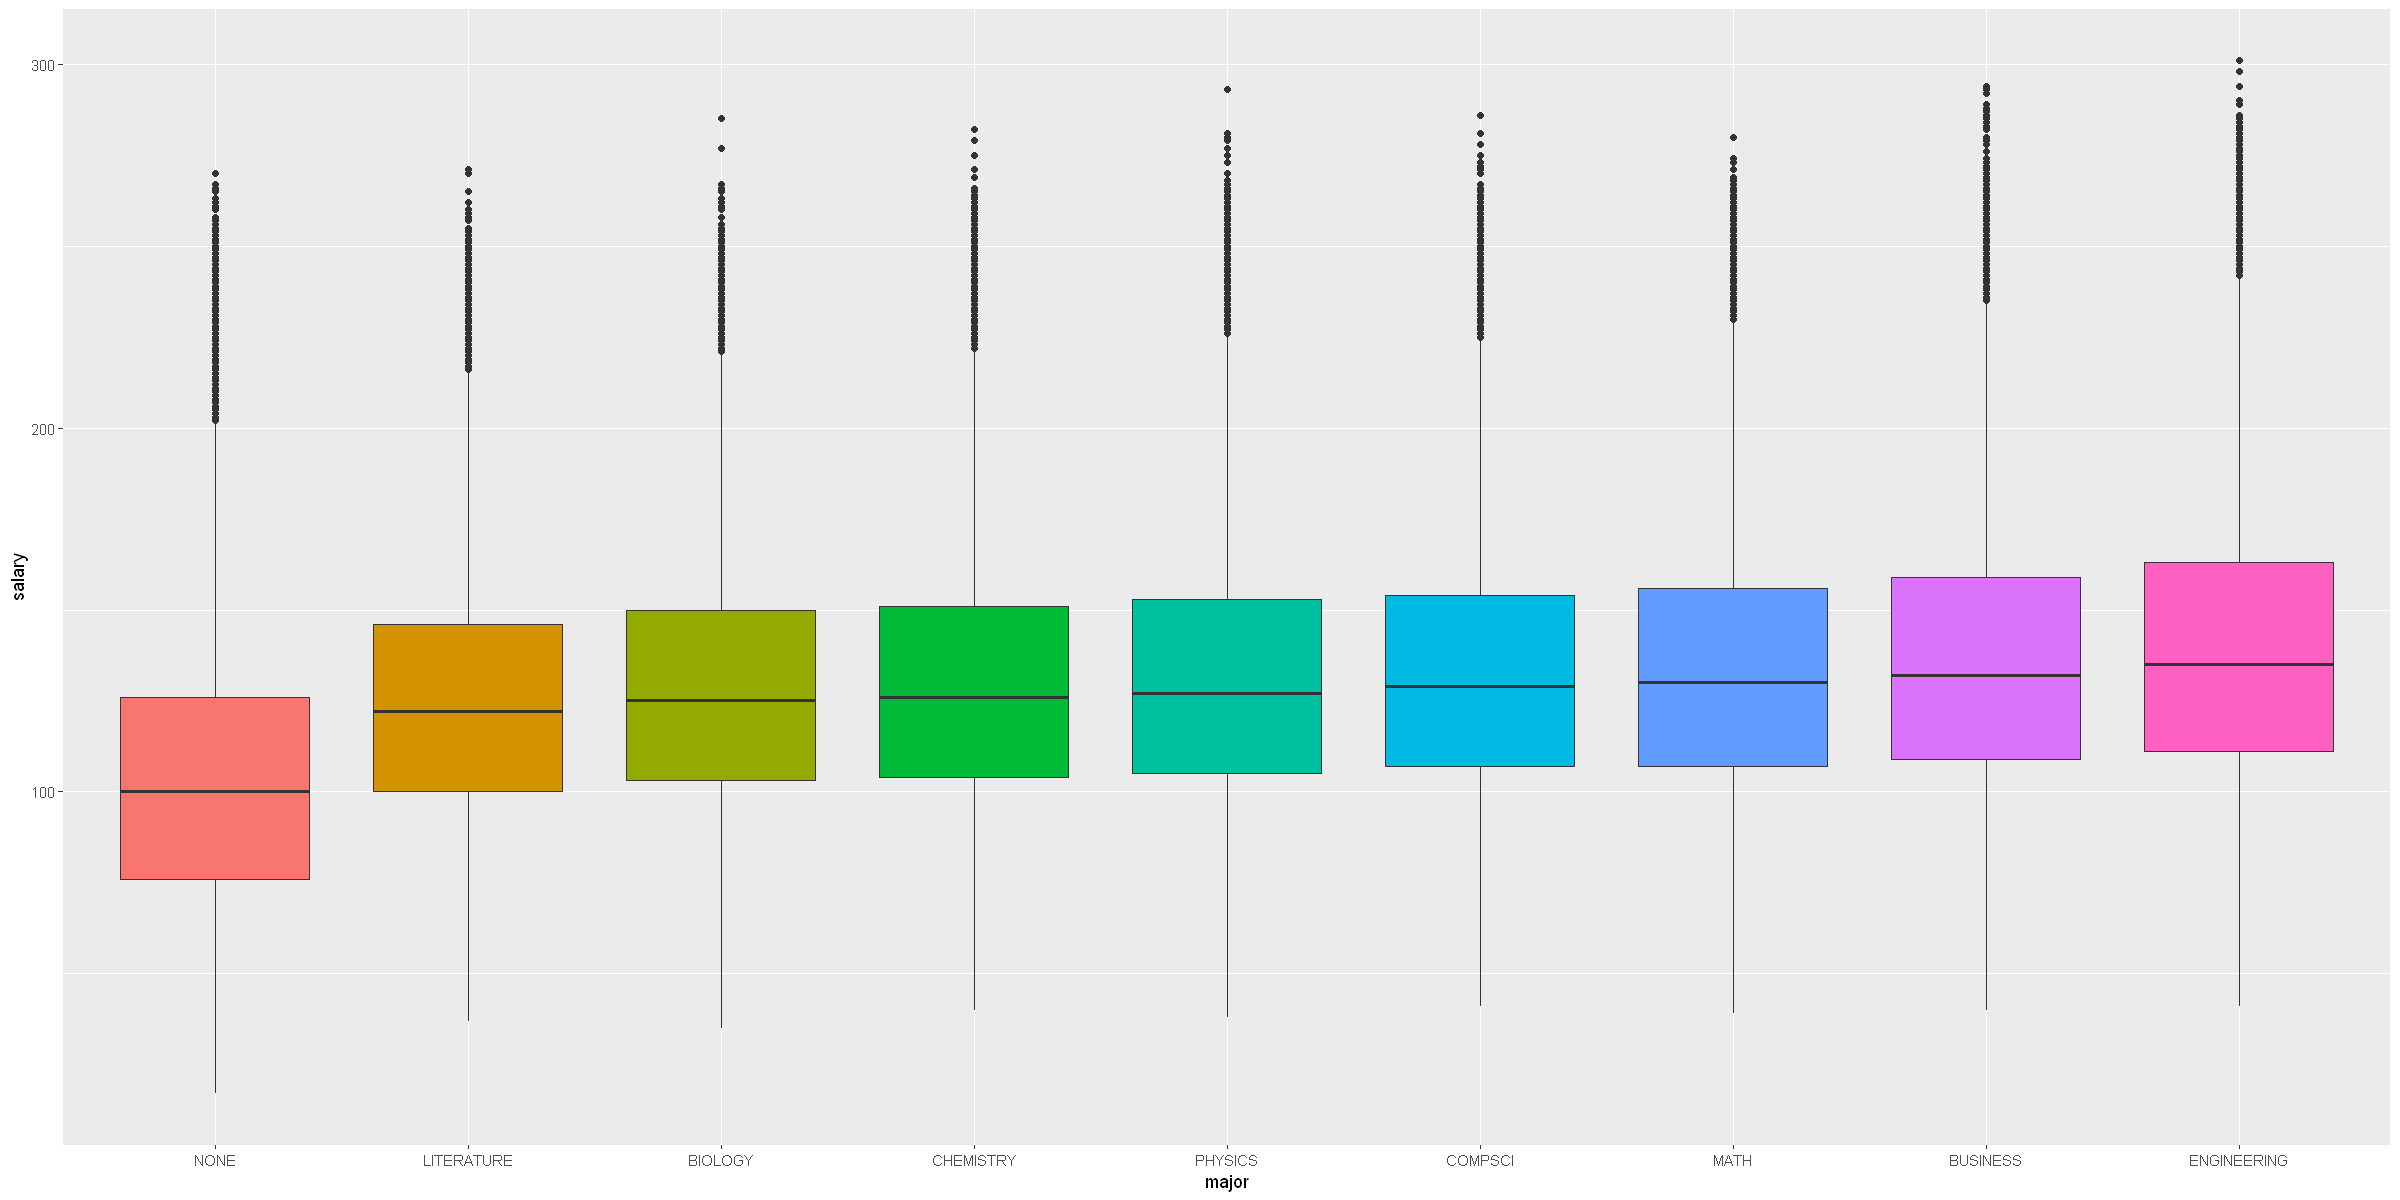

In [313]:
plot_feature(train_df, 'major')

#### Salary has a weak positive correlation with the technicality of the major

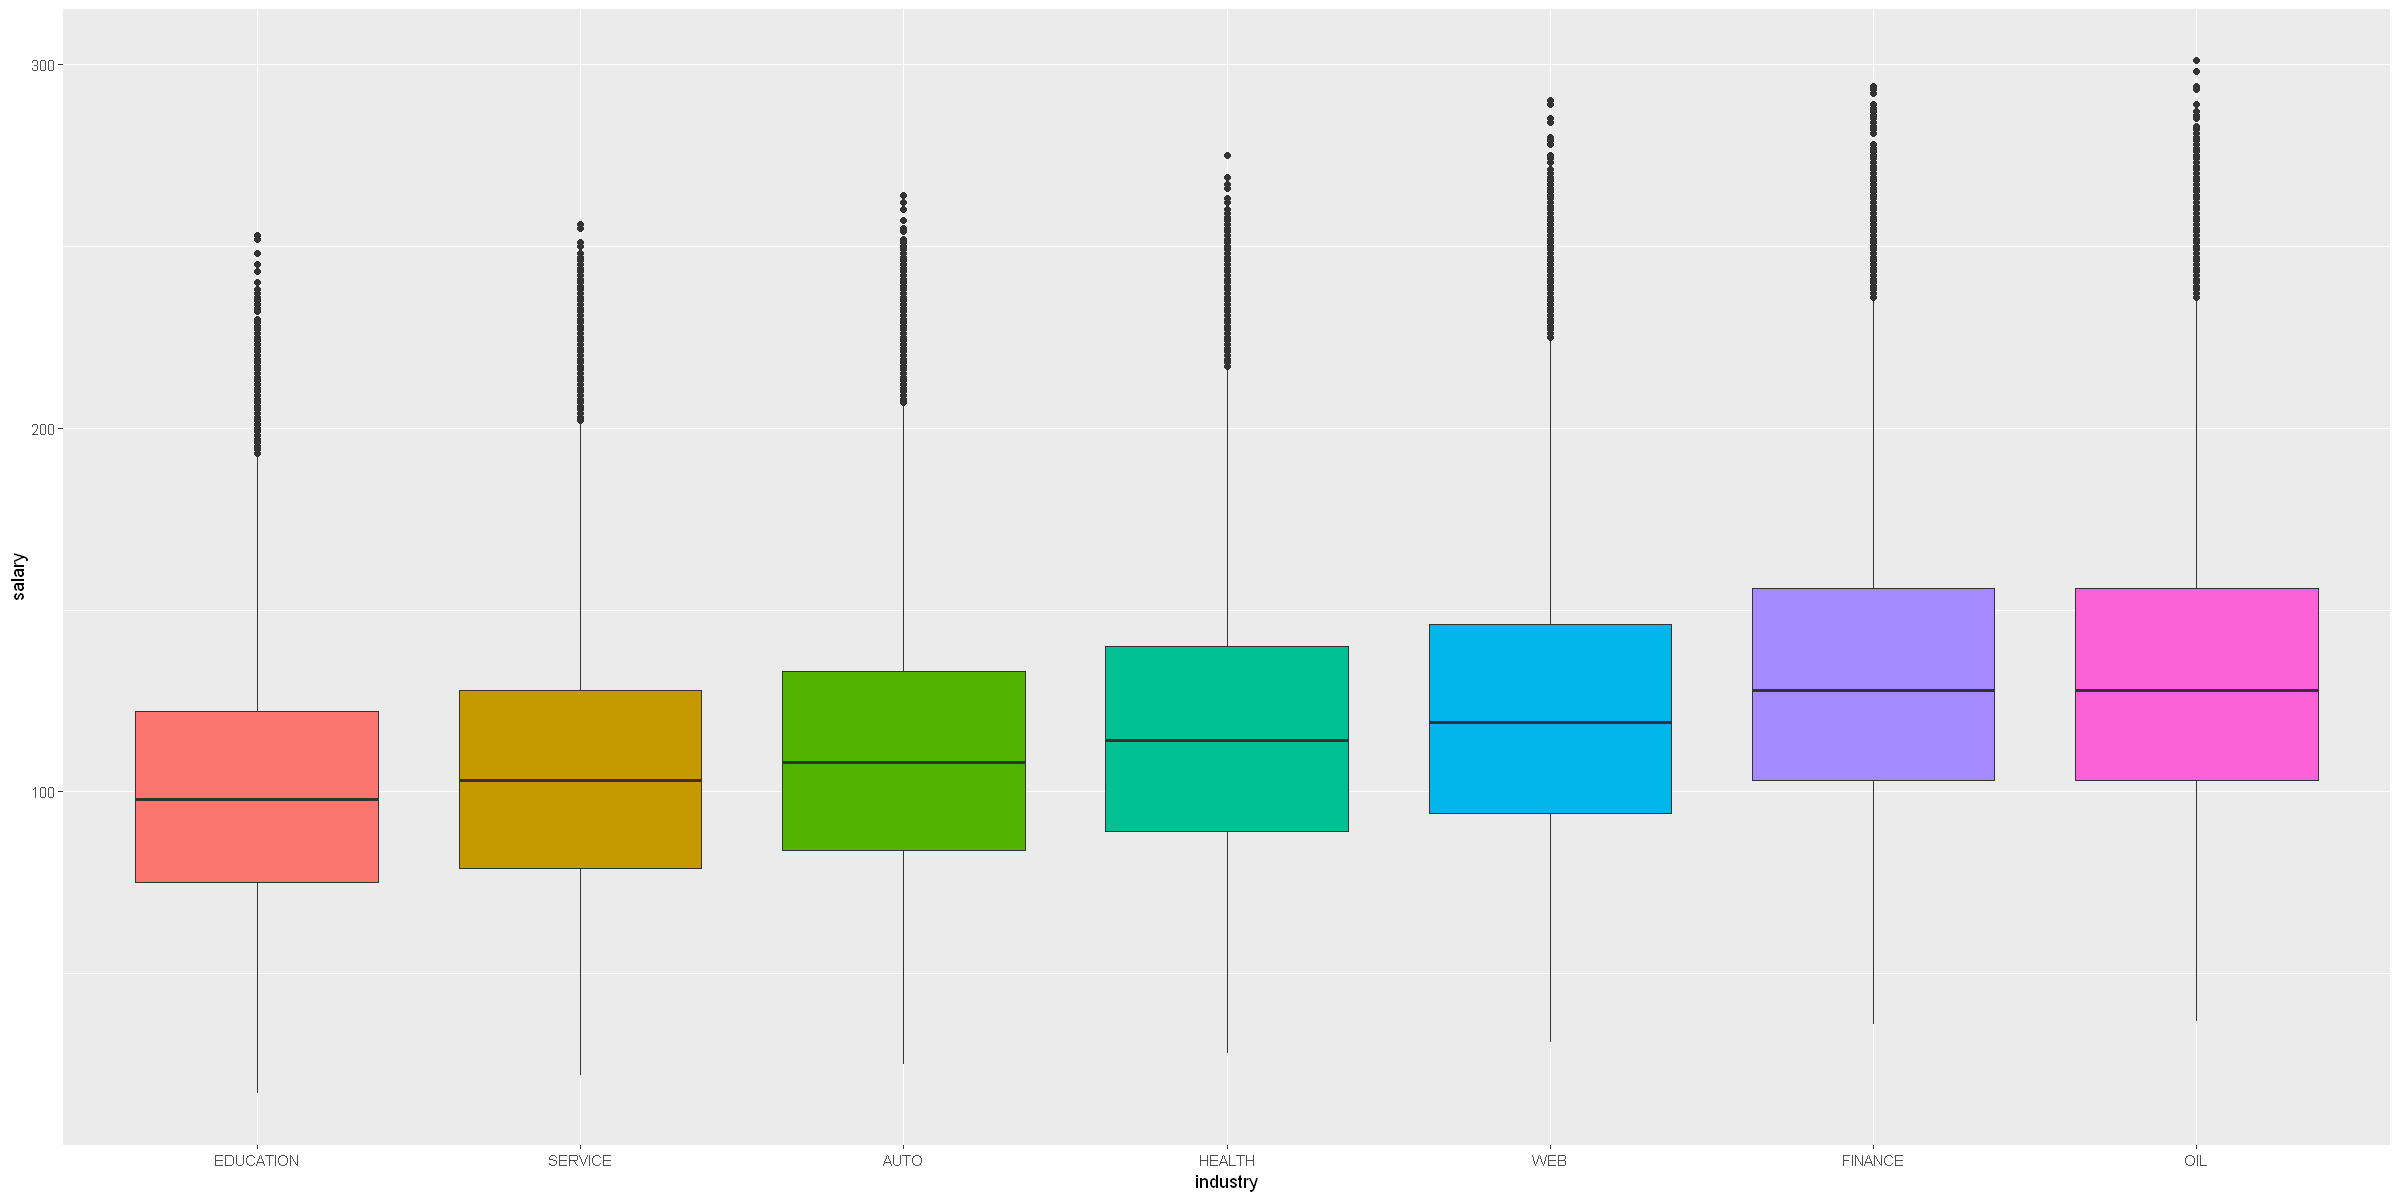

In [314]:
plot_feature(train_df, 'industry')

#### Salary for industries like finance and oil is generally higher

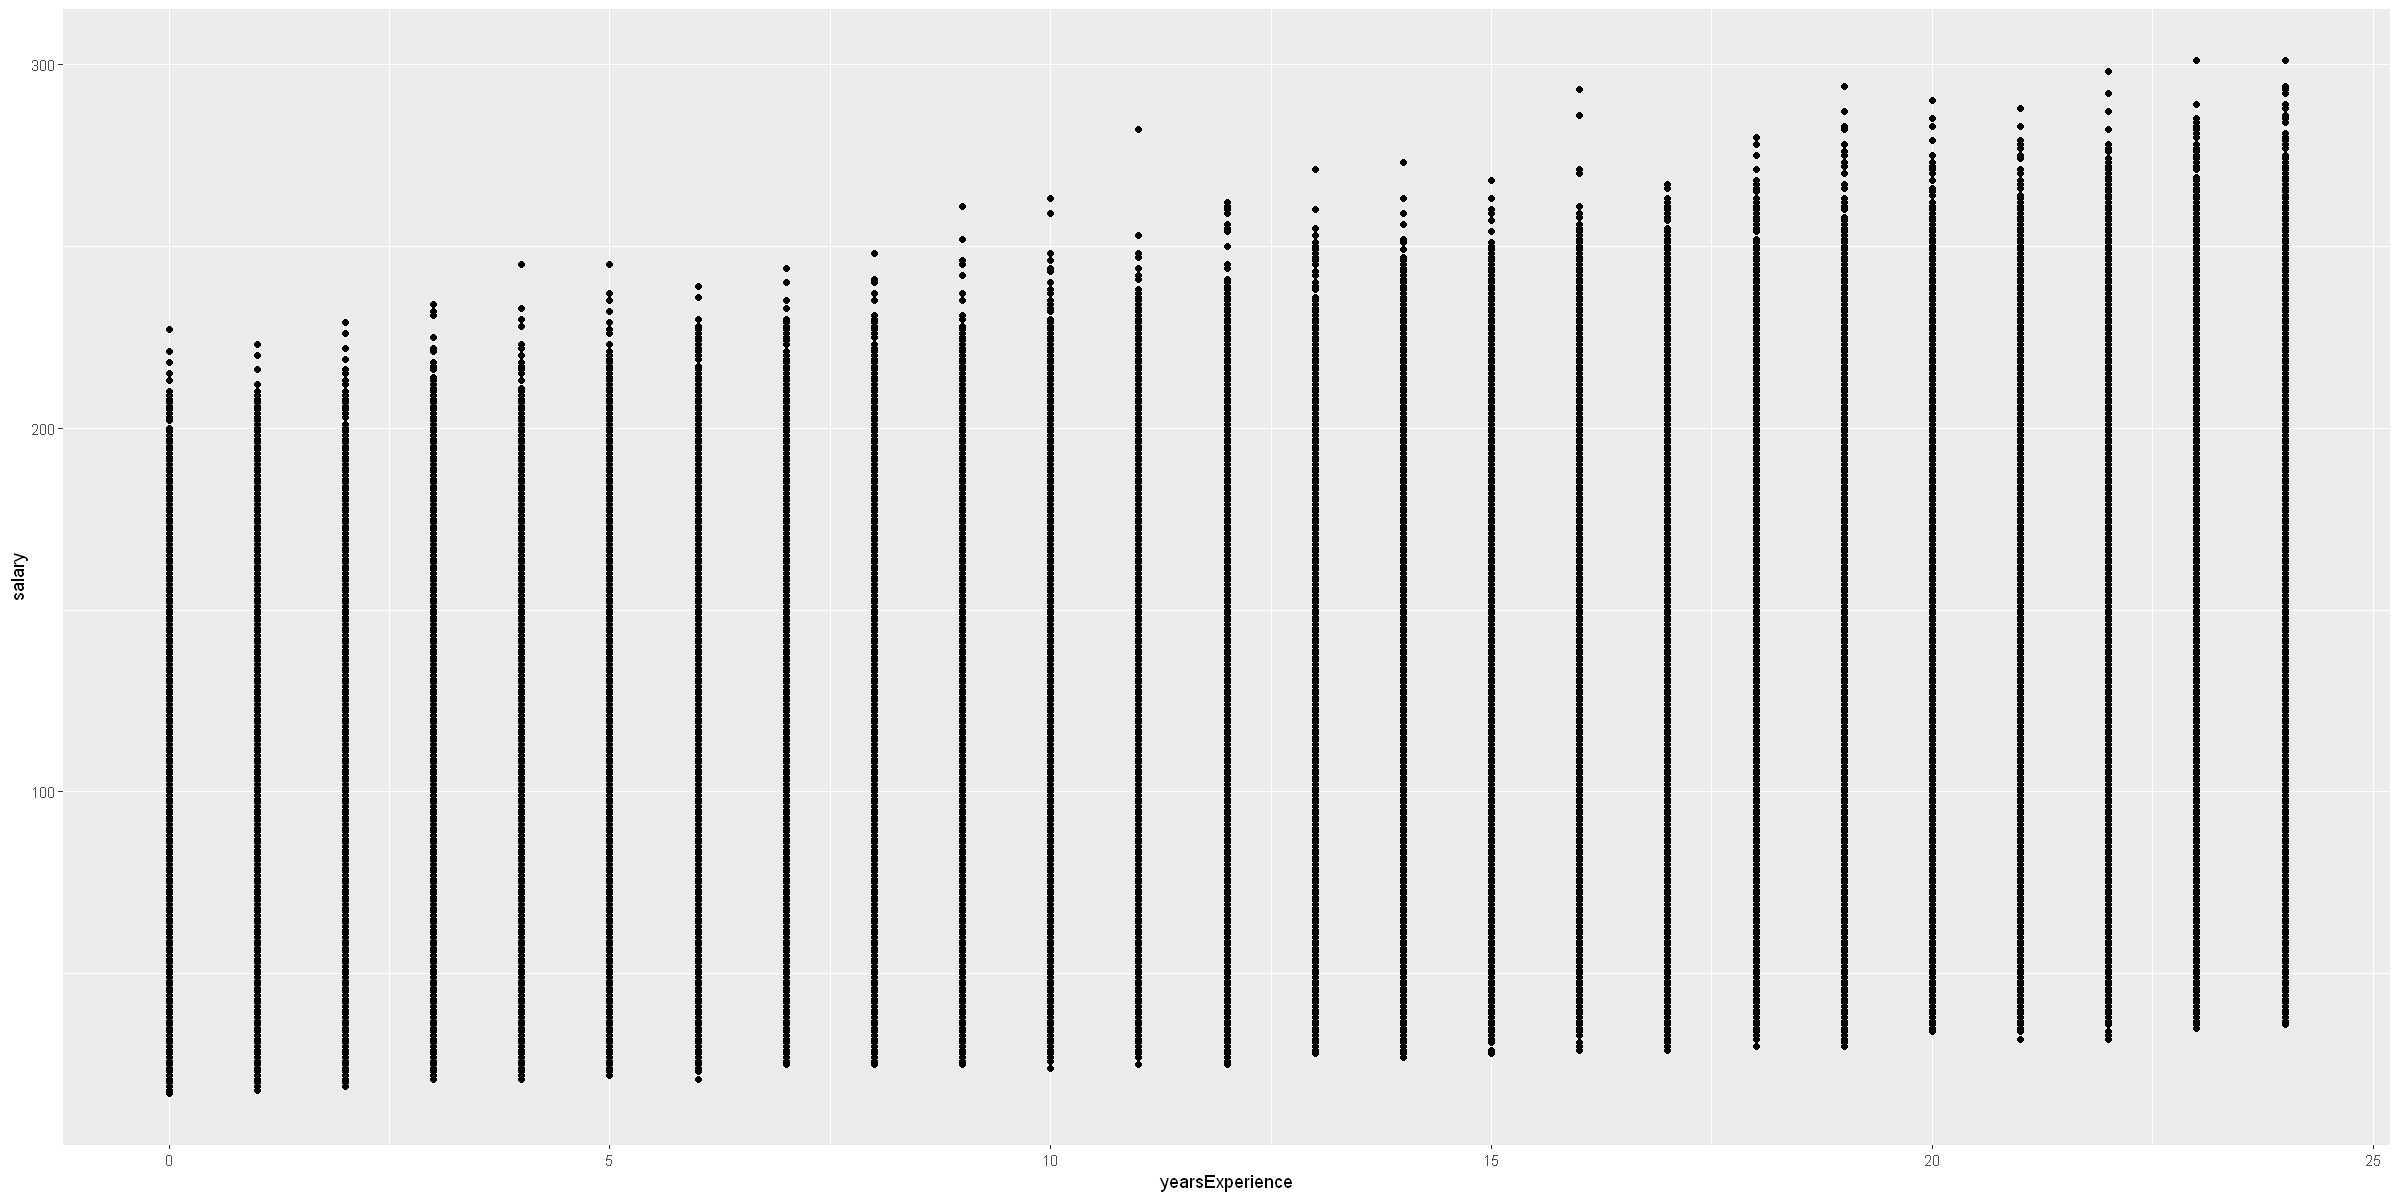

In [332]:
plot_feature(train_df, 'yearsExperience')

#### Salary has a strong positive correlation with years of experience

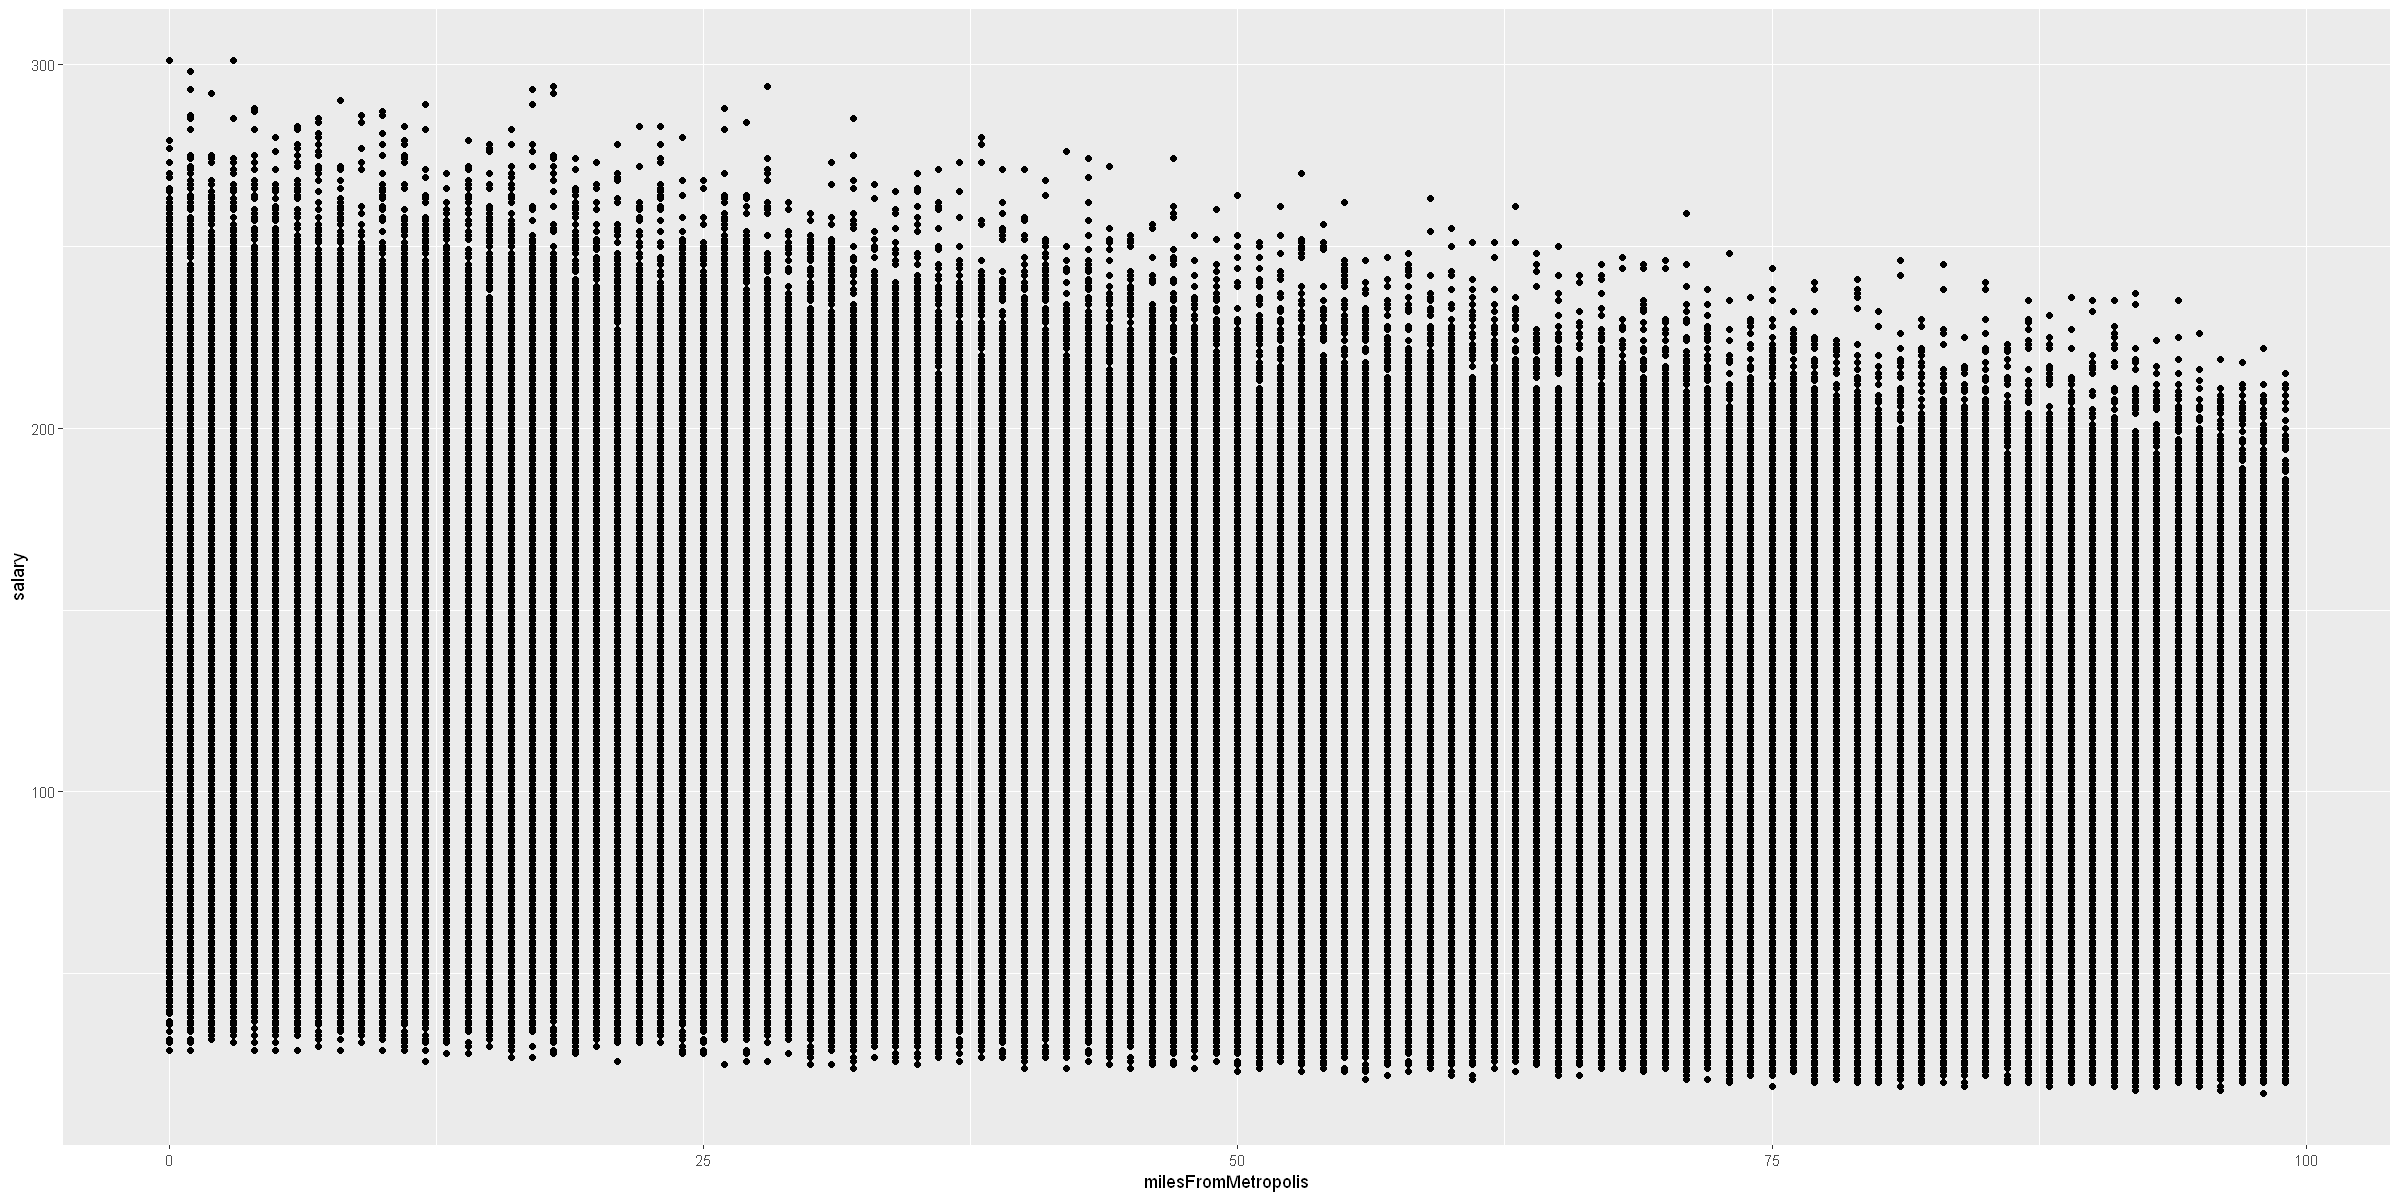

In [333]:
plot_feature(train_df, 'milesFromMetropolis')

#### Salary has a strong negative correlation with miles away from metropolis

### ---- 5 Establish a baseline ----

### ---- 6 Hypothesize solution ----

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [41]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [42]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [43]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [44]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [45]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----